In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5515,ham,You are a great role model. You are giving so ...,NaN,NaN,NaN
4320,ham,"K, jason says he's gonna be around so I'll be ...",NaN,NaN,NaN
5804,spam,Congratulations U can claim 2 VIP row A Ticket...,NaN,NaN,NaN
6339,spam,Double your mins & txts on Orange or 1/2 price...,NaN,NaN,NaN
1729,ham,Lol yeah at this point I guess not,NaN,NaN,NaN


In [4]:
df.shape

(6699, 5)

## 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          6699 non-null   object
 1   v2          6699 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 261.8+ KB


In [6]:
# Dropping last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
3877,ham,What you need. You have a person to give na.
517,spam,Your credits have been topped up for http://ww...
771,ham,Lol! U drunkard! Just doing my hair at d momen...
699,ham,K..u also dont msg or reply to his msg..
5977,spam,Not heard from U4 a while. Call 4 rude chat pr...


In [8]:
# Renaming the Columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5902,spam,Do you want a new video handset? 750 anytime a...
2441,ham,Back in brum! Thanks for putting us up and kee...
5745,spam,Congratulation! Your Mobile No was selected as...
1276,ham,Can do lor...
3527,spam,You are a å£1000 winner or Guaranteed Caller P...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# Checking for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# Checking for duplicate values
df.duplicated().sum()

774

In [14]:
# Removing the duplicate
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5925, 2)

## 2.Exploratory Data Analysis

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1    1409
Name: count, dtype: int64

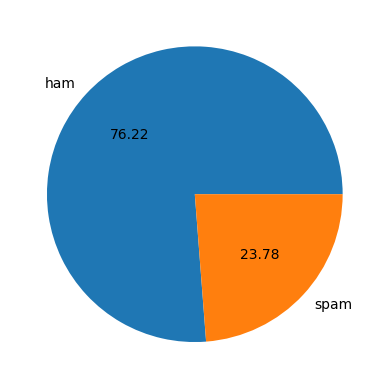

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [20]:
# Calculating number of words,characters and colums

In [21]:
import nltk

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) 

In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) 

In [27]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5925.000000,5925.000000,5925.000000
mean,86.730633,19.519662,2.054684
std,59.250057,12.994266,1.470179
min,2.000000,1.000000,1.000000
25%,38.000000,10.000000,1.000000
50%,71.000000,17.000000,2.000000
75%,135.000000,28.000000,3.000000
max,910.000000,220.000000,38.000000


In [29]:
# Analysing Spam and Ham separately 

In [30]:
# for Ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
# for spam messages

In [32]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1409.000000,1409.000000,1409.000000
mean,138.882186,27.198722,2.806246
std,31.846940,7.007522,1.487664
min,13.000000,2.000000,1.000000
25%,126.000000,24.000000,2.000000
50%,147.000000,28.000000,3.000000
75%,157.000000,31.000000,4.000000
max,387.000000,75.000000,9.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

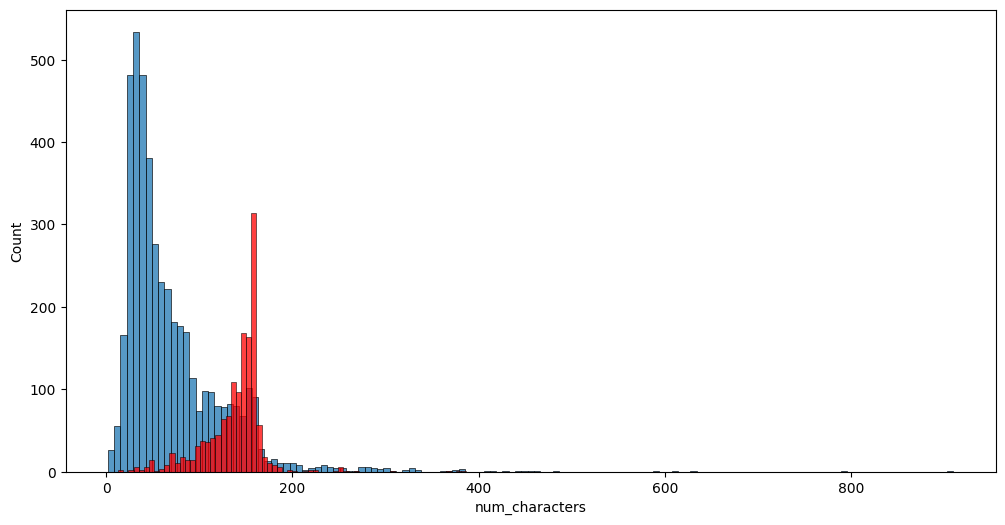

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red') 

<Axes: xlabel='num_words', ylabel='Count'>

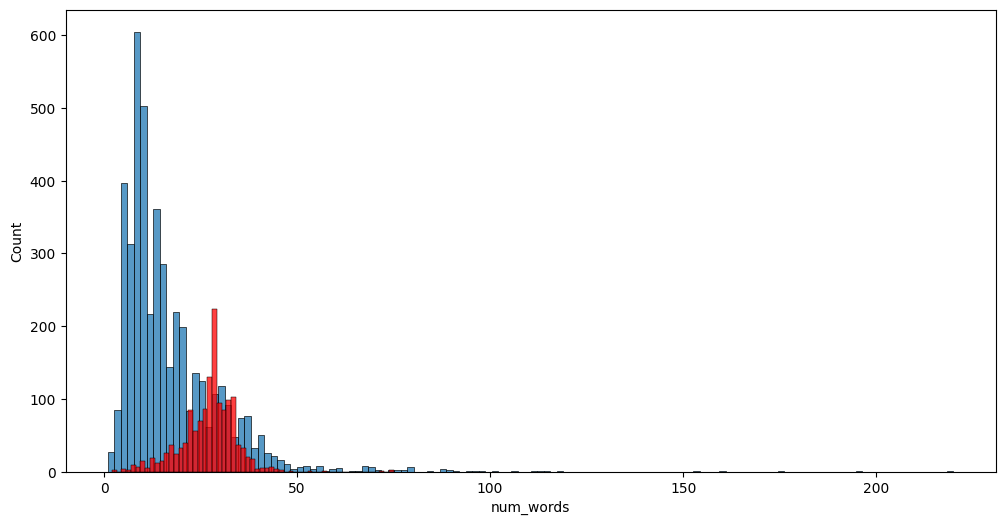

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red') 

In [36]:
#checking realtionship between columns

C:\Python 3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


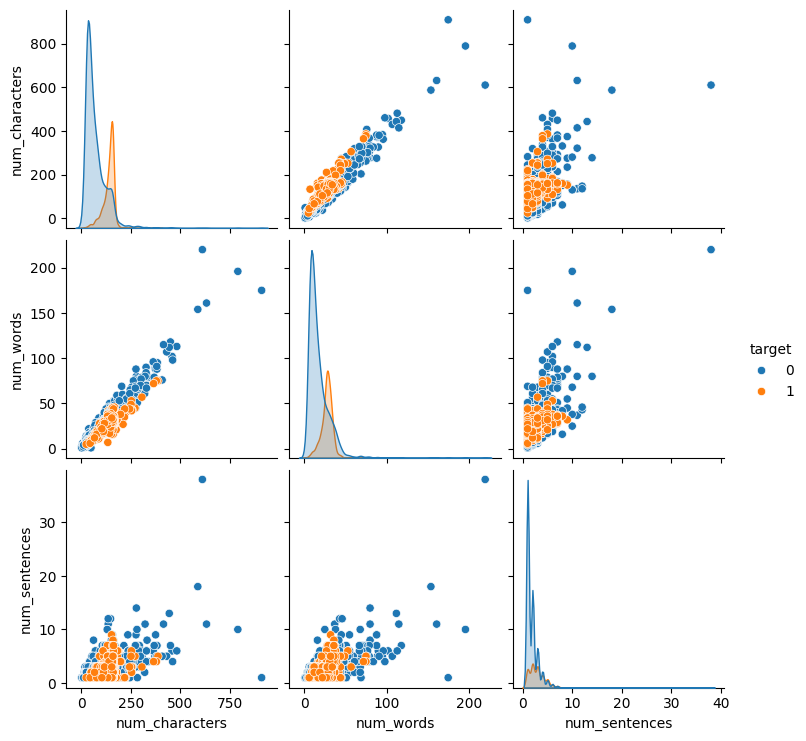

In [37]:
sns.pairplot(df,hue='target')

<Axes: xlabel='num_sentences', ylabel='Count'>

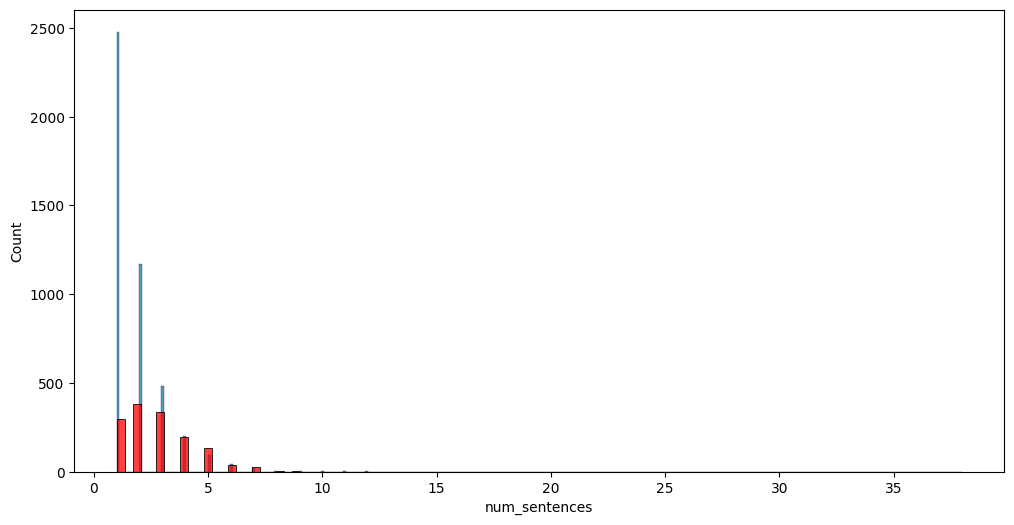

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red') 

## 3.Data Preprocessing

In [39]:
import string
from nltk.corpus import stopwords
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [40]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Studying')

'studi'

In [41]:
transform_text('hi i love you.....Do you love me Kanda?')

'hi love love kanda'

In [42]:
transform_text(' I am loving a beautiful girl who always like to keep watching the show which are more scary')

'love beauti girl alway like keep watch show scari'

In [43]:
#Checking for the data in the data set
transform_text(' Is that seriously how you spell his name?')

'serious spell name'

In [44]:
df['text'][20]

'Is that seriously how you spell his name?'

In [45]:
df['transformed_text']=df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

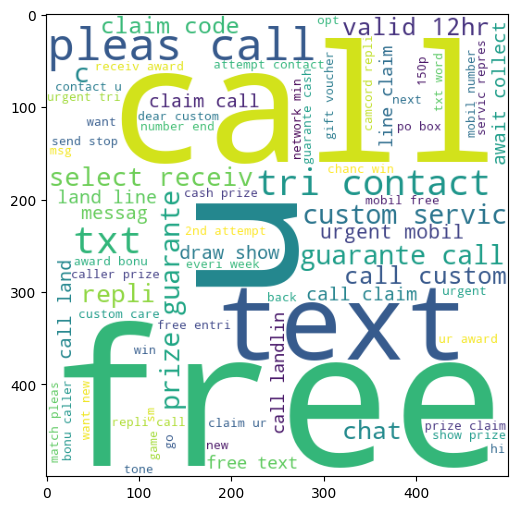

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [50]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

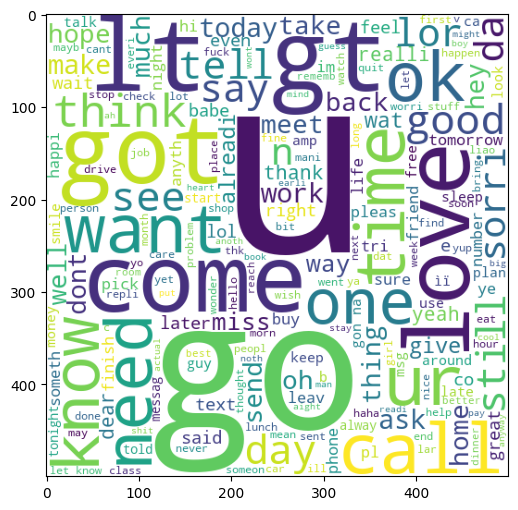

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [52]:
df[df['target']==1]

,target,text,num_characters,num_words,num_sentences,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
6688,1,More people are dogging in your area now. Call...,160,32,5,peopl dog area call 09090204448 join like mind...
6690,1,Double Mins & Double Txt & 1/2 price Call Mobi...,112,19,2,doubl min doubl txt price call mobileupd8 late...
6695,1,You have won a Nokia 7250i. This is what you g...,117,28,3,nokia 7250i get win free auction take part sen...
6696,1,Get ur 1st RINGTONE FREE NOW! Reply to this ms...,154,34,3,get ur 1st rington free repli msg tone gr8 top...


In [53]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

20931

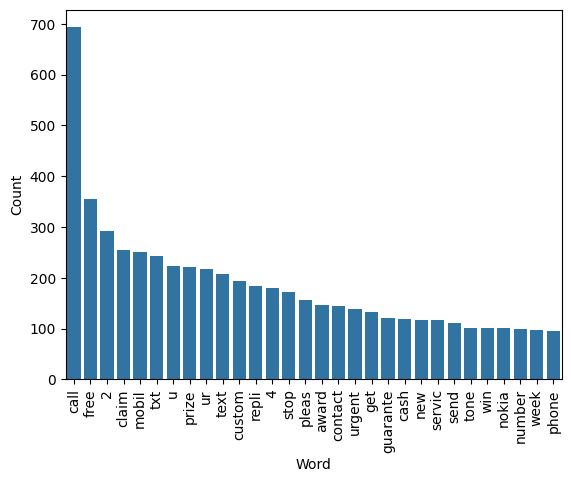

In [55]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


word_counts = Counter(spam_corpus)


common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])


sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [56]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35404

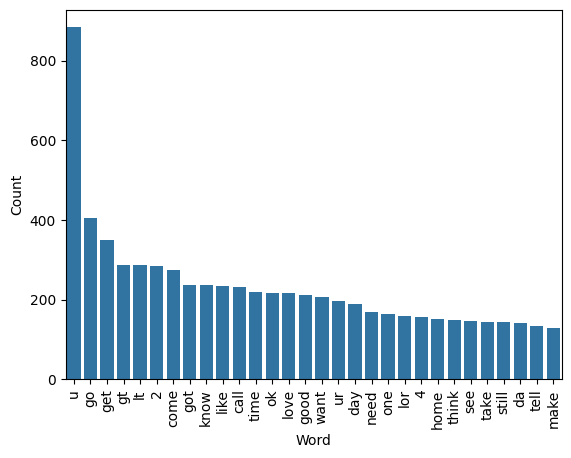

In [58]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt


word_counts = Counter(ham_corpus)


common_words_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])


sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()

## 4.Model Building

In [59]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [60]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [61]:
X.shape

(5925, 3000)

In [62]:
y=df['target'].values

In [63]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [66]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [68]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8396624472573839
[[725 170]
 [ 20 270]]
0.6136363636363636


In [69]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9670886075949368
[[891   4]
 [ 35 255]]
0.9845559845559846


In [70]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9729957805907173
[[892   3]
 [ 29 261]]
0.9886363636363636


In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [103]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [104]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [105]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [111]:
#Checking by adding f1 and recall
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return accuracy, precision, f1, recall

In [106]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9662447257383966, 0.9770992366412213)

In [107]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9662447257383966
Precision -  0.9770992366412213
For  KN
Accuracy -  0.8784810126582279
Precision -  1.0
For  NB
Accuracy -  0.9670886075949368
Precision -  0.9845559845559846
For  DT
Accuracy -  0.8987341772151899
Precision -  0.897196261682243
For  LR
Accuracy -  0.9367088607594937
Precision -  0.9497907949790795
For  RF
Accuracy -  0.9789029535864979
Precision -  0.9925650557620818
For  AdaBoost
Accuracy -  0.9493670886075949
Precision -  0.9389312977099237
For  BgC
Accuracy -  0.9611814345991562
Precision -  0.9206896551724137
For  ETC
Accuracy -  0.9822784810126582
Precision -  0.996309963099631
For  GBDT
Accuracy -  0.9274261603375528
Precision -  0.9473684210526315
For  xgb
Accuracy -  0.950210970464135
Precision -  0.9459459459459459


In [112]:
#Checking by adding f1 and recall
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision, current_f1, current_recall = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    print("F1 Score:", current_f1)
    print("Recall:", current_recall)
    print()

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    recall_scores.append(current_recall)

For SVC
Accuracy: 0.9662447257383966
Precision: 0.9770992366412213
F1 Score: 0.927536231884058
Recall: 0.8827586206896552

For KN
Accuracy: 0.8784810126582279
Precision: 1.0
F1 Score: 0.6697247706422019
Recall: 0.503448275862069

For NB
Accuracy: 0.9670886075949368
Precision: 0.9845559845559846
F1 Score: 0.9289617486338798
Recall: 0.8793103448275862

For DT
Accuracy: 0.90042194092827
Precision: 0.8981481481481481
F1 Score: 0.766798418972332
Recall: 0.6689655172413793

For LR
Accuracy: 0.9375527426160337
Precision: 0.95
F1 Score: 0.8603773584905661
Recall: 0.7862068965517242

For RF
Accuracy: 0.9789029535864979
Precision: 0.9925650557620818
F1 Score: 0.9552772808586761
Recall: 0.9206896551724137

For AdaBoost
Accuracy: 0.9493670886075949
Precision: 0.9389312977099237
F1 Score: 0.891304347826087
Recall: 0.8482758620689655

For BgC
Accuracy: 0.9611814345991562
Precision: 0.9206896551724137
F1 Score: 0.9206896551724137
Recall: 0.9206896551724137

For ETC
Accuracy: 0.9822784810126582
Precis

In [108]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [109]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.878481,1.000000
8,ETC,0.982278,0.996310
5,RF,0.978903,0.992565
2,NB,0.967089,0.984556
0,SVC,0.966245,0.977099
4,LR,0.936709,0.949791
9,GBDT,0.927426,0.947368
10,xgb,0.950211,0.945946
6,AdaBoost,0.949367,0.938931
7,BgC,0.961181,0.920690


In [114]:
import pandas as pd

# Create the DataFrame with Accuracy, Precision, F1 Score, and Recall
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'F1 Score': f1_scores,
    'Recall': recall_scores
})

print(performance_df)

   Algorithm  Accuracy  Precision  F1 Score    Recall
0        SVC  0.966245   0.977099  0.927536  0.882759
1         KN  0.878481   1.000000  0.669725  0.503448
2         NB  0.967089   0.984556  0.928962  0.879310
3         DT  0.900422   0.898148  0.766798  0.668966
4         LR  0.937553   0.950000  0.860377  0.786207
5         RF  0.978903   0.992565  0.955277  0.920690
6   AdaBoost  0.949367   0.938931  0.891304  0.848276
7        BgC  0.961181   0.920690  0.920690  0.920690
8        ETC  0.982278   0.996310  0.962567  0.931034
9       GBDT  0.927426   0.947368  0.833977  0.744828
10       xgb  0.950211   0.945946  0.892532  0.844828


In [80]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [81]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.878481
1,ETC,Accuracy,0.982278
2,RF,Accuracy,0.978903
3,NB,Accuracy,0.967089
4,SVC,Accuracy,0.966245
5,LR,Accuracy,0.936709
6,GBDT,Accuracy,0.927426
7,xgb,Accuracy,0.950211
8,AdaBoost,Accuracy,0.949367
9,BgC,Accuracy,0.961181


C:\Python 3.11\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


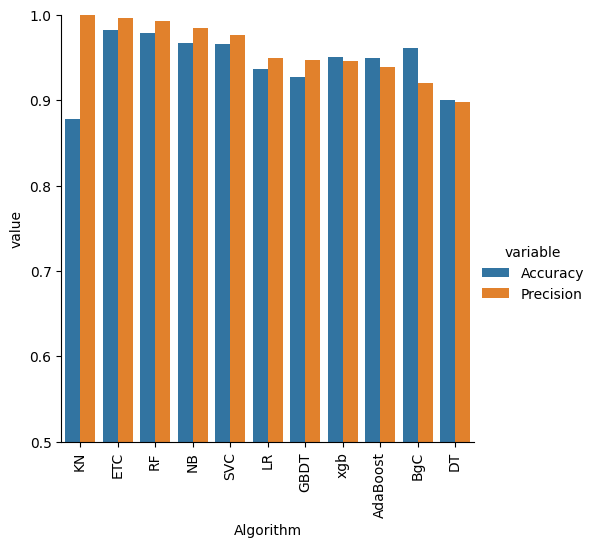

In [82]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [83]:
# Model improvement
#1.Change the max_features parameter of TfIdf

In [84]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [85]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.878481,1.000000,0.878481,1.000000
1,ETC,0.982278,0.996310,0.982278,0.996310
2,RF,0.978903,0.992565,0.978903,0.992565
3,NB,0.967089,0.984556,0.967089,0.984556
4,SVC,0.966245,0.977099,0.966245,0.977099
5,LR,0.936709,0.949791,0.936709,0.949791
6,GBDT,0.927426,0.947368,0.927426,0.947368
7,xgb,0.950211,0.945946,0.950211,0.945946
8,AdaBoost,0.949367,0.938931,0.949367,0.938931
9,BgC,0.961181,0.920690,0.961181,0.920690


In [86]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
kn= KNeighborsClassifier()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [87]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [88]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [89]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9789029535864979
Precision 0.9925650557620818


In [104]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=ExtraTreesClassifier()

In [113]:
from sklearn.ensemble import StackingClassifier

In [114]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [115]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9856540084388186
Precision 0.9894736842105263


In [117]:
pip install imblearn


   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/258.0 kB 960.0 kB/s eta 0:00:01
   ------- ------------------------------- 51.2/258.0 kB 650.2 kB/s eta 0:00:01
   ------------ -------------------------- 81.9/258.0 kB 651.6 kB/s eta 0:00:01
   ------------------- ------------------ 133.1/258.0 kB 714.4 kB/s eta 0:00:01
   --------------------------------- ------ 215.0/258.0 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 258.0/258.0 kB 991.0 kB/s eta 0:00:00


Accuracy: 0.9831
Precision: 0.9963
Recall: 0.9345
F1 Score: 0.9644

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       895
           1       1.00      0.93      0.96       290

    accuracy                           0.98      1185
   macro avg       0.99      0.97      0.98      1185
weighted avg       0.98      0.98      0.98      1185



In [134]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming X_train, X_test, y_train, y_test are your training and testing data

# Define the base models
etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC(probability=True, random_state=42)
bgc = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Combine them into a voting classifier
voting_classifier = VotingClassifier(estimators=[
    ('extra_trees', etc),
    ('random_forest', rf),
    ('svc', svc),
    ('gradient_boosting', bgc)],
    voting='soft')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the voting classifier
voting_classifier.fit(X_train, y_train)

# Predict using the voting classifier
y_pred = voting_classifier.predict(X_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9840
Precision: 1.0000
Recall: 0.9358
F1 Score: 0.9668

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       1.00      0.94      0.97       296

    accuracy                           0.98      1185
   macro avg       0.99      0.97      0.98      1185
weighted avg       0.98      0.98      0.98      1185



In [135]:
joblib.dump(voting_classifier, 'voting_classifier.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Precision Score:", precision)
print("Recall Score:", recall)
print("F1 Score:", f1)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.9814345991561182
Confusion Matrix:
 [[886   3]
 [ 19 277]]
Precision Score: 0.9892857142857143
Recall Score: 0.9358108108108109
F1 Score: 0.9618055555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.99      0.94      0.96       296

    accuracy                           0.98      1185
   macro avg       0.98      0.97      0.97      1185
weighted avg       0.98      0.98      0.98      1185



In [142]:

joblib.dump(tfidf, 'tfidf_vectorizer_revised.joblib')
joblib.dump(etc, 'etc_model.joblib')

['etc_model.joblib']